### Import Libraries & loading data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('../data_set/Online Retail.xlsx')

### clean & preprocess data

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
df.shape

(541909, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [48]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [49]:
df.duplicated().sum()

5268

In [50]:
df = df.drop_duplicates()

In [51]:
df.duplicated().sum()

0

In [52]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [53]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### drop rows of Quantity or UnitPrice that less or equal to zero

In [56]:
df[(df['Quantity'] <=0) | (df['UnitPrice']<=0)].shape[0] / len(df)

0.022191014033724765

In [57]:
df = df[~((df['Quantity'] < 0) | (df['UnitPrice']<=0))]

In [58]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

<Axes: >

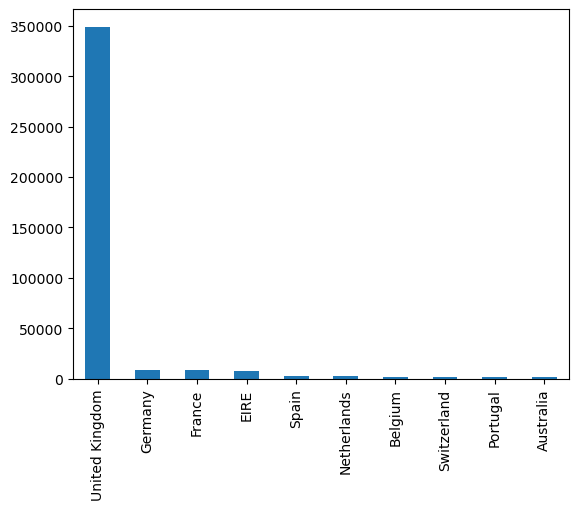

In [59]:
df['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

###### United Kingdom is the most selling country

### the top 5 country

In [60]:
top_countries = df['Country'].value_counts().sort_values(ascending=False).head().index
top_countries

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')

In [61]:
top_prices_by_country = df.groupby('Country')['UnitPrice'].apply(lambda x: x.sort_values(ascending=False))
top_prices_by_country.groupby('Country').head(5)

Country            
Australia    142988    350.00
             108024     14.95
             228215     14.95
             108020     14.95
             108022     14.95
                        ...  
Unspecified  282744     16.95
             308810     16.95
             308808     16.95
             308801     14.95
             308802     14.95
Name: UnitPrice, Length: 185, dtype: float64

###### we saw that Australia  is the heighest unite price

In [62]:
df[df['Country'] == 'Australia'].describe()

,Quantity,UnitPrice,CustomerID
count,1181.000000,1181.000000,1181.000000
mean,71.033870,3.053133,12454.560542
std,98.781975,10.390344,392.097358
min,1.000000,0.190000,12386.000000
25%,10.000000,1.250000,12415.000000
50%,32.000000,1.790000,12415.000000
75%,100.000000,3.750000,12415.000000
max,1152.000000,350.000000,16321.000000


In [63]:
df[df['Country'] == 'Australia']['UnitPrice']

197       8.50
198       4.95
199       1.25
200       5.45
201       6.35
          ... 
497681    2.95
497682    0.39
497683    0.85
497684    5.95
497685    2.95
Name: UnitPrice, Length: 1181, dtype: float64

### top sold products

In [64]:
df['StockCode'].nunique()

3665

In [65]:
top_stokes = df['StockCode'].value_counts().head(20).index
top_stokes

Index(['85123A',    22423, '85099B',    84879,    47566,    20725,    22720,
         'POST',    23203,    20727,    22383,    22197,    21212,    23298,
          23209,    22086,    22382,    22469,    20728,    22457],
      dtype='object')

Text(0.5, 1.0, 'Mean Prices for each Month')

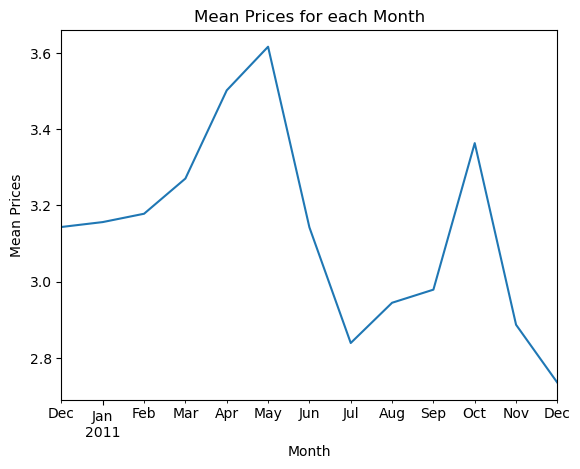

In [66]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='M')).mean()['UnitPrice'].plot(stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean Prices')
plt.title('Mean Prices for each Month')

Text(0.5, 1.0, 'Sum Quantity for each Day')

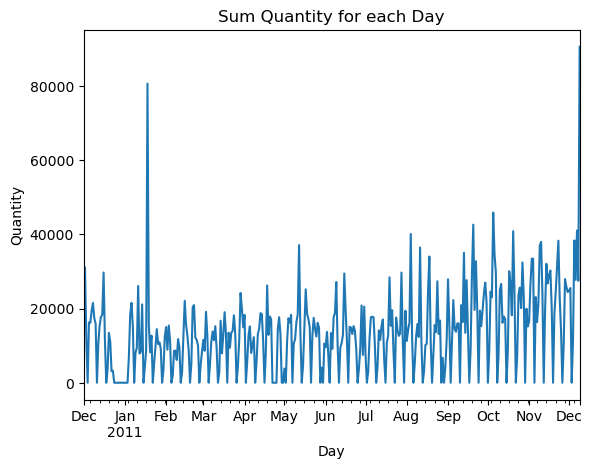

In [67]:
df.groupby(pd.Grouper(key='InvoiceDate',freq='d')).sum()['Quantity'].plot(stacked=True)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Sum Quantity for each Day')

In [68]:
df['Month'] = df['InvoiceDate'].dt.month

In [69]:
df['Day_of_month'] = df['InvoiceDate'].dt.day

In [70]:
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [71]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day_of_month,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,9,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,4


### Top descriptions

In [72]:
df['Description'].nunique()

3877

In [73]:
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

<Axes: >

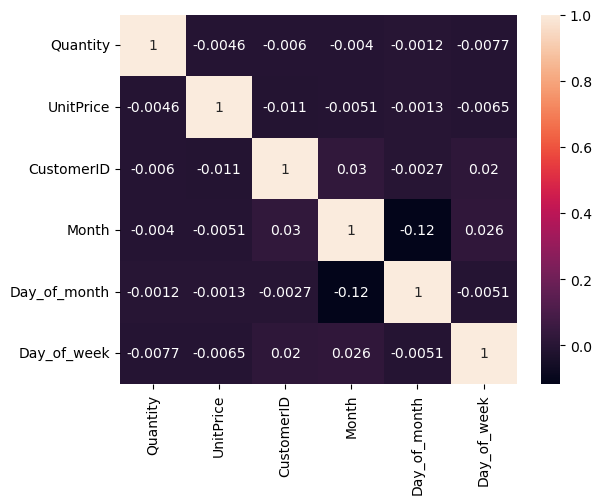

In [74]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

####  preprocessing for model

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [76]:
features = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean',  
    'InvoiceDate': 'max'
}).reset_index()

In [77]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.iloc[:, [1, 2]])

In [78]:
features_scaled

array([[-0.4250965 , 14.4808251 ],
       [ 0.3544168 ,  0.2519028 ],
       [-0.03533985,  0.2287025 ],
       ...,
       [-0.29517762, -0.21507759],
       [ 1.52368675,  0.03358203],
       [-0.16525874,  0.07899116]])

In [79]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

In [80]:
pca_result

array([[ 9.93890101, 10.54007825],
       [ 0.4287327 , -0.07248834],
       [ 0.13672804,  0.18670614],
       ...,
       [-0.36080492,  0.05663927],
       [ 1.10115531, -1.05366315],
       [-0.06100039,  0.17271076]])

In [81]:
list_of_inirtisa = []
for n in range(1, 10):
    km = KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(pca_result)
    list_of_inirtisa.append(km.inertia_)
    print(n, km.inertia_)

1 8676.0
2 4573.479293344316
3 3295.1922181024893
4 2493.5205970539037
5 1736.1516833455412
6 1303.7951751313692
7 945.3842587064144
8 778.6349002771063
9 651.4802169387015


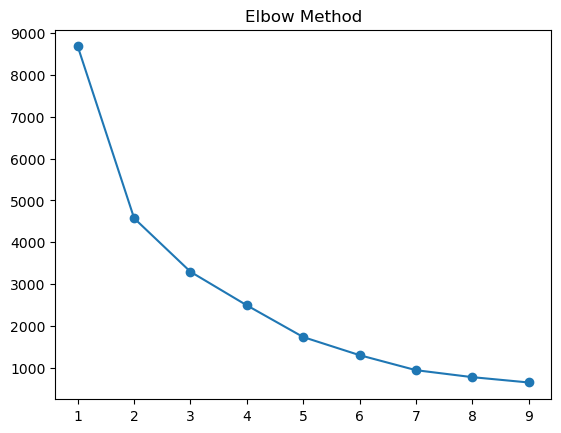

In [82]:
plt.plot(range(1, 10), list_of_inirtisa, marker='o')
plt.title('Elbow Method')
plt.show()

In [83]:
kmeans = KMeans(n_clusters=3)
features['KMeans_Cluster'] = kmeans.fit_predict(pca_result)

In [84]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
features['Agg_Cluster'] = agg_clustering.fit_predict(pca_result)

In [85]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(features_scaled)

In [86]:
tsne_result

array([[ 39.68429  ,  12.665361 ],
       [ 49.066544 , -11.1641035],
       [ 23.86517  ,  -3.0577233],
       ...,
       [-38.239418 , -49.43247  ],
       [ 57.08799  ,  19.540289 ],
       [ 21.260754 ,   5.4074497]], dtype=float32)

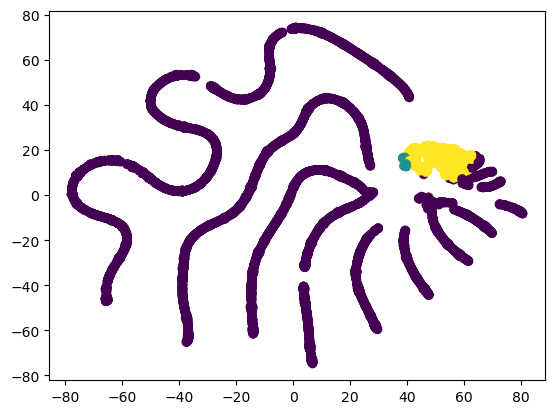

In [87]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=features['KMeans_Cluster'])
plt.show()

In [88]:
silhouette = silhouette_score(pca_result, features['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {silhouette}')

K-Means Silhouette Score: 0.8025610658244068
